# Petrol Talep Mevsimselliği
# Enerji İstatistik Notu 50
# Barış Sanlı , barissanli2@gmail.com

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile


In [48]:
# bu dosyayı https://www.jodidata.org/_resources/files/downloads/oil-data/world_secondary_csv.zip?iid=150
#indirdikten sonra çalıştırın, dosya ismini de joil2.zip yapmayı unutmayına
with ZipFile('./joil2.zip') as zf:
    for file in zf.namelist():
        if not file.endswith('.csv'): # optional filtering by filetype
            continue
        with zf.open(file) as f:
            do2 = pd.read_csv(f)

In [49]:
do2['OBS_VALUE'] = pd.to_numeric(do2['OBS_VALUE'], errors='coerce').fillna(pd.NA)

In [50]:
do2.FLOW_BREAKDOWN.unique()

array(['CLOSTLV', 'IPTRANSF', 'PTRANSF', 'RECEIPTS', 'REFGROUT',
       'STATDIFF', 'STOCKCH', 'TOTDEMO', 'TOTEXPSB', 'TOTIMPSB'],
      dtype=object)

In [51]:
type(do2.OBS_VALUE)

pandas.core.series.Series

In [52]:
country=["US","CN","IN","JP","FR","DE","GB","SA","KR"]
flow="TOTDEMO"
unit="KTONS"


In [53]:
sec=do2[do2.REF_AREA.isin(country) & (do2.FLOW_BREAKDOWN==flow) & (do2.UNIT_MEASURE==unit)]

In [54]:
a={}
for c in country:
    tmp=sec[sec.REF_AREA==c]    
    a[c] = tmp.pivot(index='TIME_PERIOD', columns='ENERGY_PRODUCT', values='OBS_VALUE')

In [55]:
#a
country

['US', 'CN', 'IN', 'JP', 'FR', 'DE', 'GB', 'SA', 'KR']

In [56]:
a["t"]=a['US']+ a['CN'] + a['IN'] +  a['JP'] + a['FR'] +  a['DE'] +  a['GB'] + a['SA'] + a['KR']


In [57]:
a["t"]

ENERGY_PRODUCT,GASDIES,GASOLINE,JETKERO,KEROSENE,LPG,NAPHTHA,ONONSPEC,RESFUEL,TOTPRODS
TIME_PERIOD,,,,,,,,,
2002-01,38943.5405,40079.1765,NaN,15982.6709,8411.8448,NaN,NaN,12910.0769,146006.0
2002-02,34764.7027,38062.0588,NaN,13955.9241,7389.6552,NaN,NaN,11317.1538,133112.0
2002-03,38398.7838,42720.1765,NaN,14149.9873,7279.1724,NaN,NaN,12569.8462,145562.0
2002-04,37111.8378,41645.3529,NaN,12328.0886,6513.1724,NaN,NaN,11507.4615,137743.0
2002-05,36072.8378,44262.0588,NaN,11582.5823,6500.1552,NaN,NaN,11540.5385,139400.0
...,...,...,...,...,...,...,...,...,...
2024-05,57938.2432,59832.0000,11670.0,15874.4557,15326.7414,16408.0,41381.2426,10598.0769,217358.0
2024-06,56169.1892,57296.4118,11072.0,15058.9241,15029.8966,16278.0,40031.7337,11092.8462,210957.0
2024-07,56568.4595,59778.4118,12014.0,16103.0253,15330.9655,17089.0,36376.6509,10789.4615,212036.0


In [58]:
date_range = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M') 
# Ensure the DataFrame length matches the date range 
df = a["t"].iloc[:len(date_range)] 
a["t"]['Date'] = date_range 
a["t"]['Date'] = a["t"]['Date'].dt.to_period('M')
# Set the date column as the index
a["t"].set_index('Date', inplace=True)

/var/folders/_1/hfj8zq4503j_64m7p0snclz40000gn/T/ipykernel_4993/3683276526.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')


In [59]:
a["t"]

ENERGY_PRODUCT,GASDIES,GASOLINE,JETKERO,KEROSENE,LPG,NAPHTHA,ONONSPEC,RESFUEL,TOTPRODS
Date,,,,,,,,,
2002-01,38943.5405,40079.1765,NaN,15982.6709,8411.8448,NaN,NaN,12910.0769,146006.0
2002-02,34764.7027,38062.0588,NaN,13955.9241,7389.6552,NaN,NaN,11317.1538,133112.0
2002-03,38398.7838,42720.1765,NaN,14149.9873,7279.1724,NaN,NaN,12569.8462,145562.0
2002-04,37111.8378,41645.3529,NaN,12328.0886,6513.1724,NaN,NaN,11507.4615,137743.0
2002-05,36072.8378,44262.0588,NaN,11582.5823,6500.1552,NaN,NaN,11540.5385,139400.0
...,...,...,...,...,...,...,...,...,...
2024-05,57938.2432,59832.0000,11670.0,15874.4557,15326.7414,16408.0,41381.2426,10598.0769,217358.0
2024-06,56169.1892,57296.4118,11072.0,15058.9241,15029.8966,16278.0,40031.7337,11092.8462,210957.0
2024-07,56568.4595,59778.4118,12014.0,16103.0253,15330.9655,17089.0,36376.6509,10789.4615,212036.0


In [60]:
monthly_seasonality = a['t'].groupby(a['t'].index.month).mean()

In [61]:
monthly_seasonality.index = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]

In [63]:
normalized_seasonality = (monthly_seasonality - monthly_seasonality.min()) / (monthly_seasonality.max() - monthly_seasonality.min())

In [64]:
print(normalized_seasonality)


ENERGY_PRODUCT   GASDIES  GASOLINE   JETKERO  KEROSENE       LPG   NAPHTHA  \
January         0.485540  0.374291  0.385818  0.966661  1.000000  1.000000   
February        0.000000  0.000000  0.000000  0.486738  0.486455  0.319372   
March           0.791444  0.631219  0.562693  0.574089  0.622837  0.660585   
April           0.306655  0.395134  0.317282  0.011924  0.100526  0.176919   
May             0.485677  0.750164  0.533718  0.000000  0.165501  0.337710   
June            0.442045  0.664087  0.664707  0.021732  0.032777  0.049460   
July            0.471386  0.920314  0.941809  0.199885  0.201366  0.497918   
August          0.549844  1.000000  1.000000  0.300237  0.184223  0.664291   
September       0.503419  0.488351  0.625696  0.041624  0.000000  0.000000   
October         1.000000  0.733196  0.680282  0.332585  0.285799  0.347788   
November        0.712426  0.443252  0.396659  0.332748  0.412299  0.480687   
December        0.960226  0.666861  0.634600  1.000000  0.950789

/var/folders/_1/hfj8zq4503j_64m7p0snclz40000gn/T/ipykernel_4993/2122982416.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')


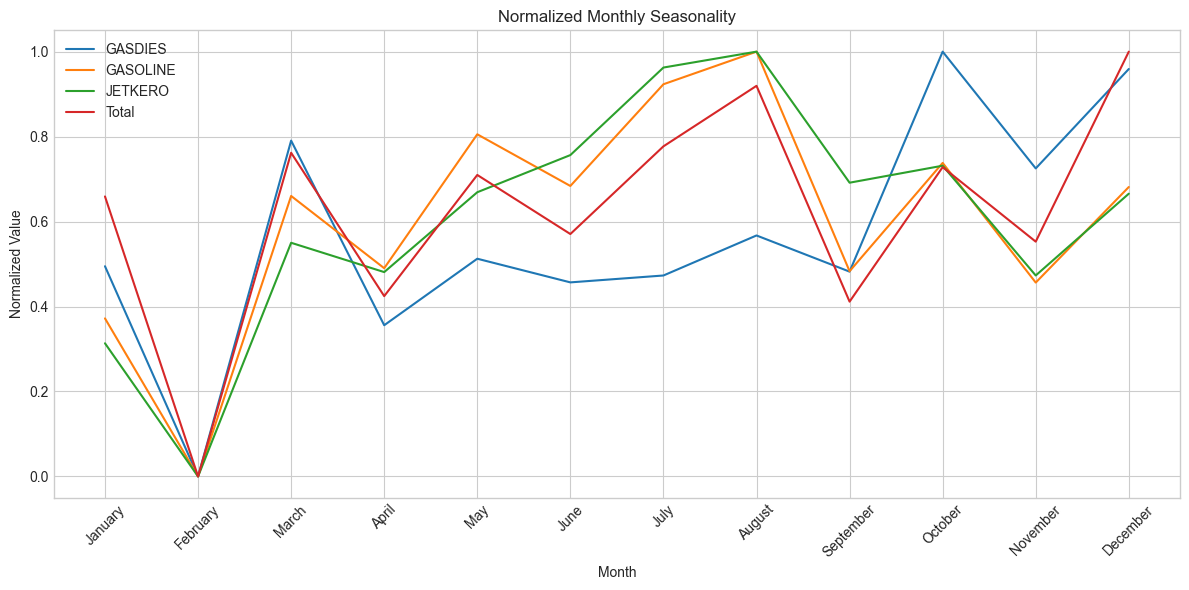

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
dates = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')

# Ensure the index is a DatetimeIndex
#a['t'].index = pd.to_datetime(a['t'].index)

# Interpolate missing data linearly
a['t'] = a['t'].interpolate(method='linear')

# Filter out the year 2022
a_filtered = a['t'][~(a['t'].index.year == 2020)]

# Group data by month and calculate the mean (seasonality)
monthly_seasonality = a_filtered.groupby(a_filtered.index.month).mean()

# Normalize the data
normalized_seasonality = (monthly_seasonality - monthly_seasonality.min()) / (monthly_seasonality.max() - monthly_seasonality.min())

# Rename the index to month names for clarity
normalized_seasonality.index = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Plotting the normalized seasonality data
plt.figure(figsize=(12, 6))
plt.plot(normalized_seasonality.index, normalized_seasonality['GASDIES'], label='GASDIES')
plt.plot(normalized_seasonality.index, normalized_seasonality['GASOLINE'], label='GASOLINE')
plt.plot(normalized_seasonality.index, normalized_seasonality['JETKERO'], label='JETKERO')
plt.plot(normalized_seasonality.index, normalized_seasonality['TOTPRODS'], label='Total')

plt.title('Normalized Monthly Seasonality')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


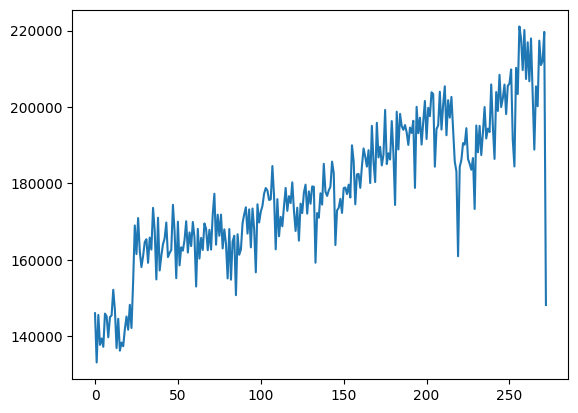

In [73]:
plt.plot( a["t"]['TOTPRODS'].values)

/var/folders/_1/hfj8zq4503j_64m7p0snclz40000gn/T/ipykernel_4993/1593000832.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')
/var/folders/_1/hfj8zq4503j_64m7p0snclz40000gn/T/ipykernel_4993/1593000832.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')


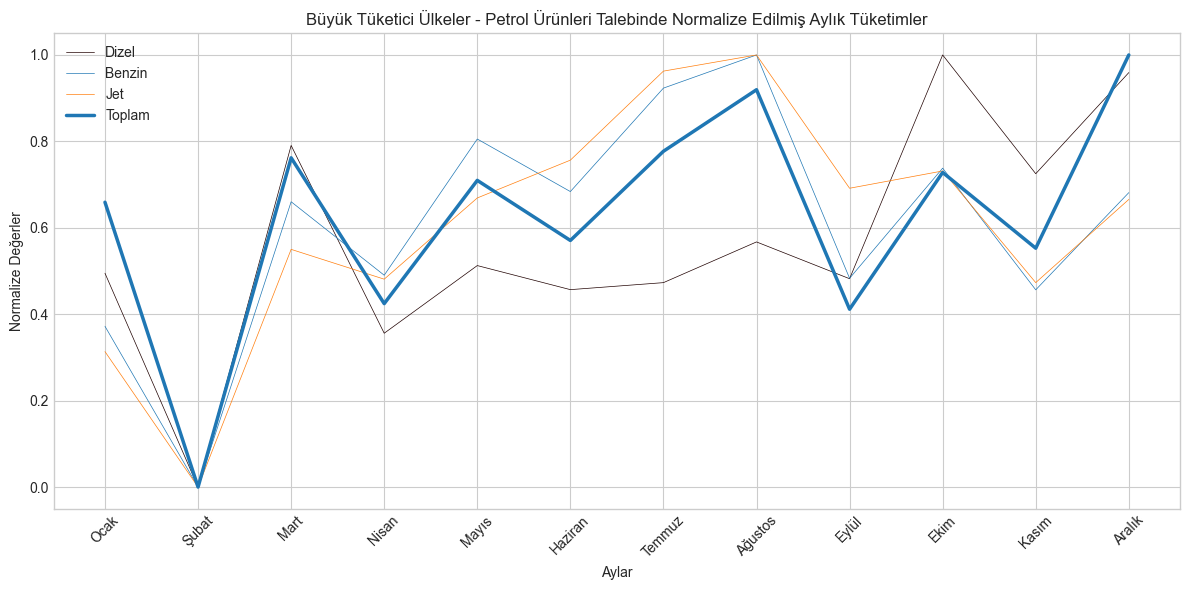

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dx=a["IN"]
txt="Hindistan"

dx=a["t"]
txt="Dünya"

dx=a["CN"]
txt="Çin"

dx=a["US"]
txt="ABD"

dx=a["DE"]
txt="Almanya"

dx=a["IN"]
txt="Hindistan"

dx=a["SA"]
txt="Suudi"

dx=a["t"]
txt="Büyük Tüketici Ülkeler"
#monthly_seasonality = a['t'].groupby(a['t'].index.month).mean()
#monthly_seasonality.index = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]

plt.style.use('seaborn-v0_8-whitegrid')

# Sample DataFrame for demonstration
dates = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M')
date_range = pd.date_range(start='2002-01-01', end='2024-09-30', freq='M') 
# Ensure the DataFrame length matches the date range 
df = dx.iloc[:len(date_range)] 
dx['Date'] = date_range 
dx['Date'] = dx['Date'].dt.to_period('M')
# Set the date column as the index
dx.set_index('Date', inplace=True)

# Ensure the index is a DatetimeIndex
#a['t'].index = pd.to_datetime(a['t'].index)

# Interpolate missing data linearly
dx = dx.interpolate(method='linear')

# Filter out the year 2022
a_filtered = dx[~(dx.index.year == 2020)]

# Group data by month and calculate the mean (seasonality)
monthly_seasonality = a_filtered.groupby(a_filtered.index.month).mean()

# Normalize the data
normalized_seasonality = (monthly_seasonality - monthly_seasonality.min()) / (monthly_seasonality.max() - monthly_seasonality.min())

# Rename the index to month names for clarity
normalized_seasonality.index = [
    'Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
    'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'
]

# Plotting the normalized seasonality data
plt.figure(figsize=(12, 6))
plt.plot(normalized_seasonality.index, normalized_seasonality['GASDIES'], label='Dizel', linewidth=0.5,color='#1f0000')
plt.plot(normalized_seasonality.index, normalized_seasonality['GASOLINE'], label='Benzin', linewidth=0.5)
plt.plot(normalized_seasonality.index, normalized_seasonality['JETKERO'], label='Jet', linewidth=0.5,color='#ff7f0e')
plt.plot(normalized_seasonality.index, normalized_seasonality['TOTPRODS'], label='Toplam',color='#1f77b4', linewidth=2.5)


plt.title(txt+ ' - Petrol Ürünleri Talebinde Normalize Edilmiş Aylık Tüketimler')
plt.xlabel('Aylar')
plt.ylabel('Normalize Değerler')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']